In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Load data
data_url = "https://drive.google.com/uc?id=1wYCddGhiciYpjluXApU_lAZzkVMt9vh-"

In [4]:
data = pd.read_csv(data_url)

In [5]:
# Replace '0' in Age with NaN
data['Age'] = data['Age'].replace('0', pd.NA)

In [6]:
# Replace NaN values in Age with mean
mean_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(mean_age)

In [7]:
# Replace 'x' in Gender with NaN if Gender column exists
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].replace('x', pd.NA)

In [8]:
data['Hour'] = pd.to_datetime(data['TIME OCC']).dt.hour

In [9]:
# Question 1: Hour with the highest frequency of candidates scheduled
hourly_counts = data['Hour'].value_counts()
highest_hour = hourly_counts.idxmax()

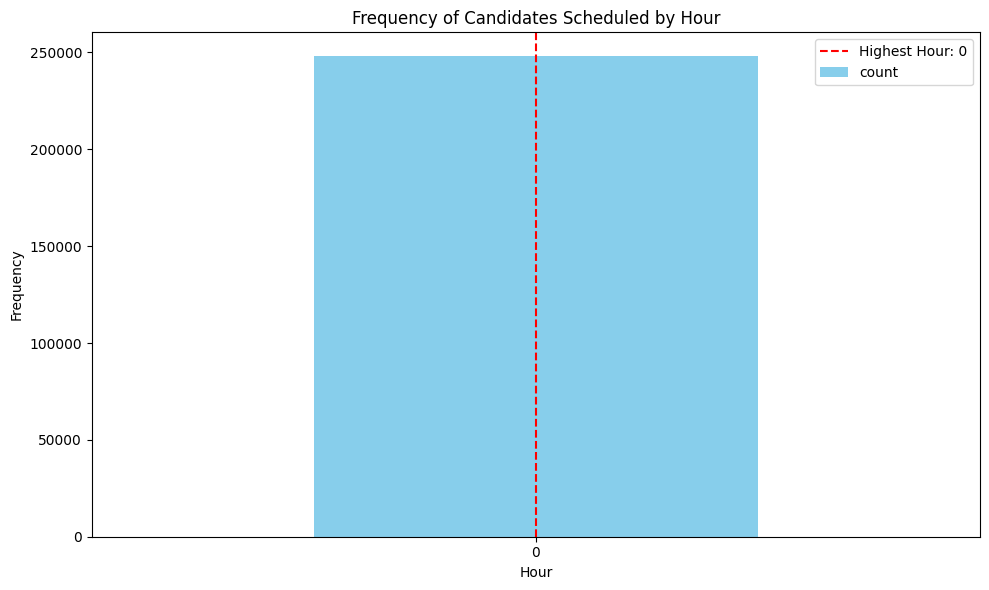

In [10]:
# Plot the frequencies
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Candidates Scheduled by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.axvline(x=highest_hour, color='red', linestyle='--', label=f'Highest Hour: {highest_hour}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Question 2: Stacked bar graph of candidates taken exam at day and night
# Define day and night time
data['Day/Night'] = ['Day' if 6 <= hour < 21 else 'Night' for hour in data['Hour']]
day_night_counts = data.groupby(['Day/Night', 'Hour']).size().unstack(fill_value=0)

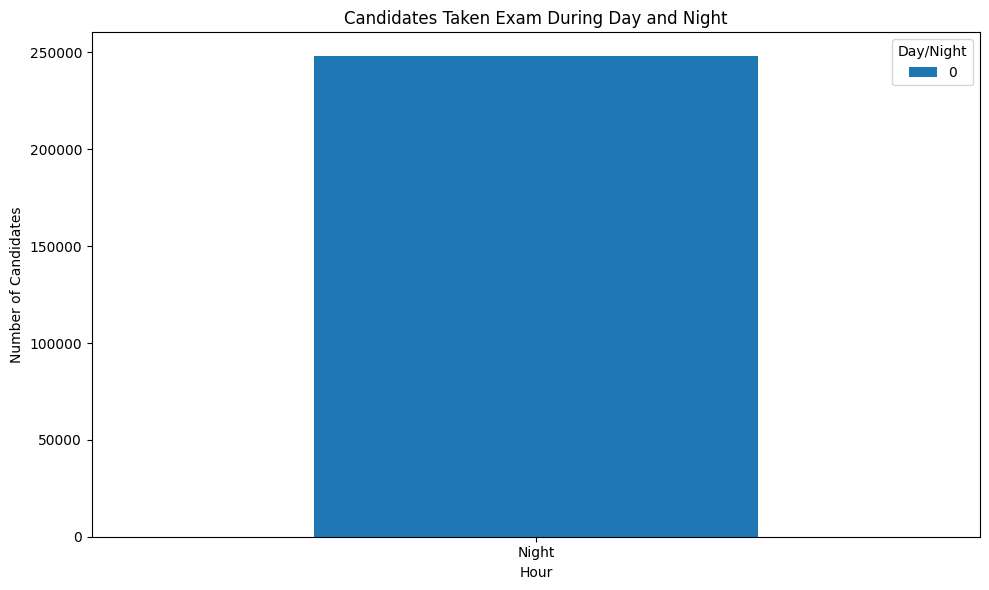

In [12]:
# Plot stacked bar graph
day_night_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Candidates Taken Exam During Day and Night')
plt.xlabel('Hour')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=0)
plt.legend(title='Day/Night')
plt.tight_layout()
plt.show()

In [13]:
# Question 3: Number of candidates scheduled to write exam in different age groups
# Define age groups
bins = [0, 18, 26, 35, 45, 55, 65, data['Age'].max()]
labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']


In [14]:
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
age_group_counts = data['Age Group'].value_counts().reindex(labels, fill_value=0)

In [15]:
print("Hour with highest frequency:", highest_hour)
print("\nNumber of candidates scheduled in different age groups:")
print(age_group_counts)

Hour with highest frequency: 0

Number of candidates scheduled in different age groups:
Age Group
0-17     66768
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14642
Name: count, dtype: int64
